In [1]:
# First, let's have a look at the function to optimize

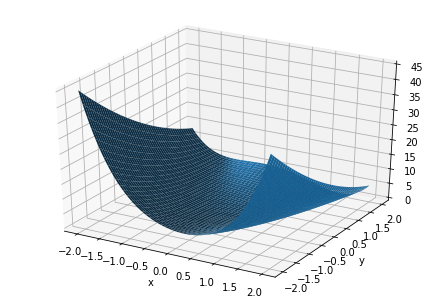

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random

# Prepare X and Y axis
x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
# Build the meshgrid
X, Y = np.meshgrid(x, y)
# Define function to plot wrt meshgrid
func = (1-X)**2 + (Y-X**2)**2
# Plot in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, func)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# Look at 2D plot from above

Text(0, 0.5, 'y')

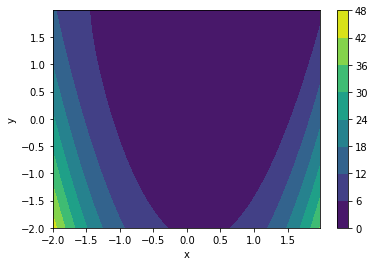

In [17]:
plt.contourf(X, Y, func)
plt.colorbar(cmap="summer")
plt.xlabel('x')
plt.ylabel('y')

In [5]:
def rosenbrock(pos):
    return (1-pos[0])**2 + (pos[1]-pos[0]**2)**2

In [19]:
def numerical_derivative_simple(func, pos, step, index):
    # Gradient computations are more precise when performed over three consecutive points, rather than two
    preceding_point = np.copy(pos)
    succeding_point = np.copy(pos)
    preceding_point[index] -= step
    succeding_point[index] += step
    # Compute for that index 
    derivative = (func(succeding_point) - func(preceding_point))/(2*step)
    return derivative

In [8]:
def rmsprop_seq(func, pos, nb_epochs, grad_square_decay, rate, step):
    # Iterate
    epsilon = 1e-8
    grad_avg = np.empty(len(pos))
    grad_avg.fill(0)
    trajectory = []
    distances = []
    with open('rosenbrock_coord_serial.csv', 'w') as filehandle:
        for epoch in range(nb_epochs):
            for index, value in enumerate(pos):
                val_grad = numerical_derivative_simple(func, pos, step, index)
                grad_avg[index] = grad_square_decay * grad_avg[index] + (1 - grad_square_decay) * val_grad**2
                pos[index] -= (rate / math.sqrt(grad_avg[index] + epsilon)) * val_grad
            trajectory.append(np.copy(pos))
            distance_to_target = math.sqrt((pos[0] - 1)**2 + (pos[1] - 1)**2)
            distances.append(distance_to_target)
            print(f'{pos[0]}, {pos[1]}, {distance_to_target}', file=filehandle)
    return distance_to_target, pos, trajectory, distances

In [11]:
def show_distance(distances):
    plt.plot(distances) 
    plt.show()

In [12]:
def show_trace(trajectory):
    x = [pos[0] for pos in trajectory] 
    y = [pos[1] for pos in trajectory] 
    plt.plot(x,y) 
    plt.gca().set_aspect("equal")
    plt.show()

4.658264295635088e-06
[0.999997861728308, 0.9999958614953885]


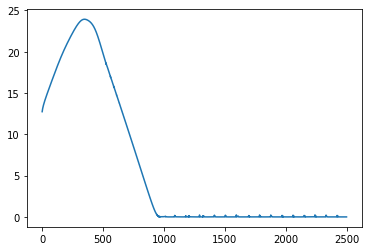

In [18]:
distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[10,10],2500,0.95,0.05,0.001)
print(distance_to_target)
print(pos)
#show_trace(trajectory)
show_distance(distances)

0.0181049796193703
[1.0067646813663973, 1.0167937301701835]


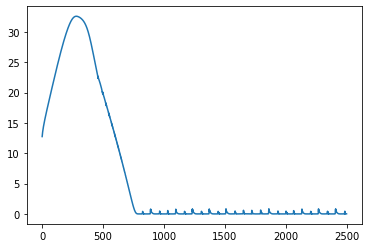

In [25]:
distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[10,10],2500,0.95,0.1,0.001)
print(distance_to_target)
print(pos)
#show_trace(trajectory)
show_distance(distances)

In [ ]:
distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[10,10],2500,0.95,0.05,0.001)
print(distance_to_target)
print(pos)
#show_trace(trajectory)
show_distance(distances)

In [35]:
def bench():
    initial_grad = 0.1
    initial_learn = 0.3
    best_grad = 0
    best_learn = 0
    best_pos = [-1,-1]
    nb_steps = 1000
    for i in range(15):
        current_grad = initial_grad / 2**i
        #print("grad", current_grad)
        min_dist = 1000
        for j in range(70):
            current_learn = initial_learn + 0.01 * j
            distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[10,10],nb_steps,0.95,current_learn,current_grad)
            #print(current_learn, distance_to_target)
            if (distance_to_target < min_dist):
                min_dist = distance_to_target
                best_grad = current_grad
                best_learn = current_learn
                best_pos = pos
        #show_distance(distances)
    print("Best distance is", min_dist,"for learning rate", best_learn,"grad numerical step", best_grad,"total nb steps",nb_steps,"FINAL", best_pos)

In [36]:
bench()

Best distance is 2.011321594846483e-08 for learning rate 0.98 grad numerical step 6.103515625e-06 total nb steps 1000 FINAL [1.0000000059281688, 1.0000000192197365]


In [ ]:
x = random.randint(-5,5)
y = random.randint(-5,5)
print(x,y)
distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[x,y],1000,0.95,0.99,6.103515625e-06)
print(distance_to_target, pos)
show_distance(distances)

In [128]:
def validate(learning_rate, grad_step, nb_steps):
    max_distance = 0
    min_distance = 1000
    min_pos = [-1000,-1000]
    max_pos = [-1000,-1000]
    close = 0
    for i in range(20):
        x = random.randint(-5,5)
        y = random.randint(-5,5)
        distance_to_target, pos, trajectory, distances = rmsprop_seq(rosenbrock,[x,y],nb_steps,0.99,learning_rate,grad_step)
        if distance_to_target >= max_distance:
            max_distance = distance_to_target
            max_pos = pos
        if distance_to_target < min_distance:
            min_distance = distance_to_target
            min_pos = pos
        if distance_to_target < 0.1:
            close += 1
    return max_distance, max_pos, 100*close/20.0, min_distance, min_pos

In [132]:
def optimize_parameters():    
    initial_grad = 0.000001
    initial_learn = 0.9
    best_min_distance = 1000
    best_percent_close = 0
    best_percent_learn = 0
    best_percent_grad = 0
    # for all tested gradients
    for i in range(5):
        current_grad = initial_grad / 10**i
        min_worst_distance_over_gradient = 1000
        print()
        print("grad",current_grad)
        current_learn = 0.9
        # and all tested learning rates
        for j in range(15):
            print("learn",current_learn)
            worst_distance, worst_pos, percent_close, best_distance, best_pos = validate(current_learn, current_grad, 5000)
            # what is the learning rate that gives the minimum of the worst distance to target over a set of random tries?
            if worst_distance < min_worst_distance_over_gradient:
                min_worst_distance_over_gradient = worst_distance
                best_pos_over_gradient = worst_pos
                best_grad_over_gradient = current_grad
                best_learn_over_gradient = current_learn
            if percent_close > best_percent_close:
                best_percent_close = percent_close
                best_percent_learn = current_learn
                best_percent_grad = current_grad
            current_learn = (current_learn + 9)/10
        # do we have the best pair of parameters yet?
        if min_worst_distance_over_gradient < best_min_distance:
            best_min_distance = min_worst_distance_over_gradient
            best_grad = best_grad_over_gradient
            best_rate = best_learn_over_gradient
            best_worst_pos = best_pos_over_gradient
        print("Current Best rate is", best_rate,"best gradient step is", best_grad,"minimal maximal distance of",best_min_distance,"pos",best_worst_pos)
        print("Best percent close is",best_percent_close,"for rate",best_percent_learn,"and gradient",best_percent_grad)
    print("Overall Best rate is", best_rate,"best gradient step is", best_grad,"maximal distance of",best_min_distance,"pos",best_worst_pos)
    print("Overall best percent close is",best_percent_close,"for rate",best_percent_learn,"and gradient",best_percent_grad)

In [133]:
optimize_parameters()


grad 1e-06
learn 0.9
learn 0.99
learn 0.999
learn 0.9999
learn 0.99999
learn 0.9999990000000001
learn 0.9999999
learn 0.9999999900000001
learn 0.9999999989999999
learn 0.9999999999
learn 0.99999999999
learn 0.9999999999989999
learn 0.9999999999999
learn 0.99999999999999
learn 0.9999999999999989
learn 0.9999999999999998
learn 1.0
learn 1.0
learn 1.0
learn 1.0
Current Best rate is 0.9999999900000001 best gradient step is 1e-06 minimal maximal distance of 1.6932114116434969 pos [-0.6274956120576801, 0.5328566416475989]
Best percent close is 95.0 for rate 0.99999 and gradient 1e-06

grad 1e-07
learn 0.9
learn 0.99
learn 0.999
learn 0.9999
learn 0.99999
learn 0.9999990000000001
learn 0.9999999
learn 0.9999999900000001
learn 0.9999999989999999
learn 0.9999999999
learn 0.99999999999
learn 0.9999999999989999
learn 0.9999999999999
learn 0.99999999999999
learn 0.9999999999999989
learn 0.9999999999999998
learn 1.0
learn 1.0
learn 1.0
learn 1.0
Current Best rate is 0.9999 best gradient step is 1e

In [42]:
validate(0.98, 6.103515625e-06, 1000)

Trial 0 Start [ 10 , 5 ] final distance 0.11452258150386703
Trial 1 Start [ 10 , 7 ] final distance 0.12494920802865261
Trial 2 Start [ 0 , 5 ] final distance 0.022239020647013354
Trial 3 Start [ 4 , 6 ] final distance 1.5309185804831684
Trial 4 Start [ 7 , 2 ] final distance 0.097247241601833
Trial 5 Start [ 10 , 4 ] final distance 0.009772186955473107
Trial 6 Start [ 3 , 4 ] final distance 0.010056375447850327
Trial 7 Start [ 1 , 5 ] final distance 3.361907894632642e-07
Trial 8 Start [ 3 , 8 ] final distance 2.568713901749416e-06
Trial 9 Start [ 10 , 0 ] final distance 3.810075150926921
Trial 10 Start [ 8 , 0 ] final distance 1.890996194987032e-07
Trial 11 Start [ 1 , 7 ] final distance 0.013452105914982637
Trial 12 Start [ 1 , 1 ] final distance 6.9385362252299145e-06
Trial 13 Start [ 0 , 10 ] final distance 3.0033467763292587
Trial 14 Start [ 5 , 2 ] final distance 3.331458774751611e-07
Trial 15 Start [ 0 , 7 ] final distance 0.001974827978466258
Trial 16 Start [ 3 , 3 ] final dist